In [2]:
import pandas as pd
from sklearn.datasets import load_iris
flow=load_iris()


In [3]:
dir(flow)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df=pd.DataFrame(flow.data,columns=flow.feature_names)

In [5]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [6]:
df['target']=flow.target

In [7]:
df.head(5)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [8]:
df[45:55]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   
54                6.5               2.8                4.6               1.5   

    target  
45       0  
46       0  
47       0  
48       0  
49       0  
50       1  
51       1  
52       1  
53       1  
54       1

In [11]:
df['flower_name']=df.target.apply(lambda x: flow.target_names[x])

In [14]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [10]:
df1=df[0:50]
df2=df[50:100]
df3=df[100:]

In [15]:
from matplotlib import pyplot as plt

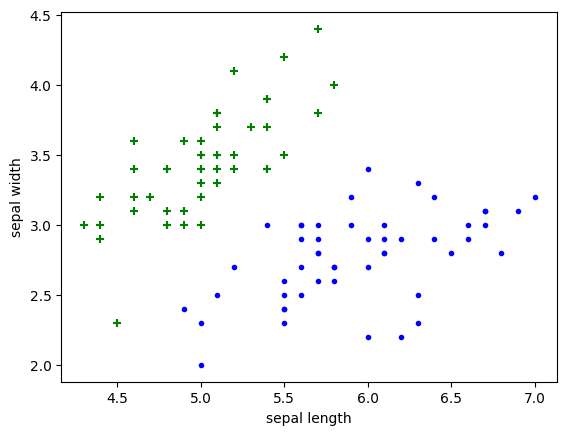

In [16]:
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',marker='+')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='blue',marker='.')
plt.show()

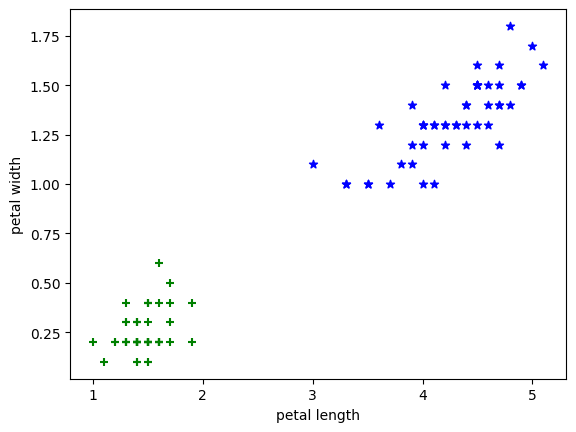

In [17]:
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='+')
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],color='blue',marker='*')

In [21]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target flower_name  
0       0      setosa  
1       0      setosa  
2       0      setosa  
3       0      setosa  
4       0      setosa

In [22]:
x=df.drop(['target','flower_name'],axis='columns')
y=df.target

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=20)

In [52]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=20)

In [42]:
y_pre=knn.predict(X_test)

In [53]:
knn.score(X_test,y_test)

1.0

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pre)
cm

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 11]])

Text(58.222222222222214, 0.5, 'Truth')

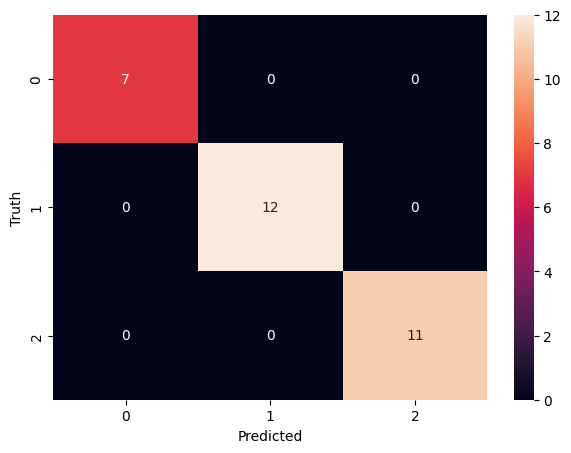

In [50]:
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')